<a href="https://colab.research.google.com/github/m-poppins/practice/blob/master/Binary_classification_of_movie_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Классификация отзывов к фильмам

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras

%matplotlib inline

## Подготовка данных

Работа проведена на наборе данных IMDB - 50000 отзывов к фильмам в Internet Movie Database.  
Набор состоит из 25000 обучающих и 25000 контрольных отзывов.  
Датасет готов к использованию: отзывы преобазованы в последовательности целых чисел, каждое из которых определяет позицию слова в словаре.

In [ ]:
from keras.datasets import imdb
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000) #Сохраняем в обучающих данных только 10 000 слов, наиболее часто встречающихся

Using TensorFlow backend.


17465344/17464789 [==============================] - 0s 0us/step


In [ ]:
def vec_seq(sequences, dimension=10000):
    res = np.zeros((len(sequences), dimension))
    for i, s in enumerate(sequences):
        res[i, s] = 1.
    return res

In [ ]:
X = vec_seq(X_train)
X_test = vec_seq(X_test)

y_test=np.asarray(y_test).astype('float32')
y=np.asarray(y_train).astype('float32')

## Конструируем сеть

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

## Проверка решения

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.4) #выделили валидационную выборку

In [ ]:
model.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.RMSprop(),
    metrics=['acc']
) 

In [ ]:
history=model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val), batch_size=512)

Epoch 1/20
30/30 [==============================] - 1s 43ms/step - loss: 0.5450 - acc: 0.7991 - val_loss: 0.4248 - val_acc: 0.8657
Epoch 2/20
30/30 [==============================] - 1s 38ms/step - loss: 0.3420 - acc: 0.8976 - val_loss: 0.3280 - val_acc: 0.8822
Epoch 3/20
30/30 [==============================] - 1s 38ms/step - loss: 0.2466 - acc: 0.9239 - val_loss: 0.2921 - val_acc: 0.8854
Epoch 4/20
30/30 [==============================] - 1s 41ms/step - loss: 0.1916 - acc: 0.9407 - val_loss: 0.3079 - val_acc: 0.8759
Epoch 5/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1549 - acc: 0.9523 - val_loss: 0.3151 - val_acc: 0.8764
Epoch 6/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1288 - acc: 0.9618 - val_loss: 0.2949 - val_acc: 0.8830
Epoch 7/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1091 - acc: 0.9677 - val_loss: 0.3072 - val_acc: 0.8813
Epoch 8/20
30/30 [==============================] - 1s 38ms/step - loss: 0.0899 - a

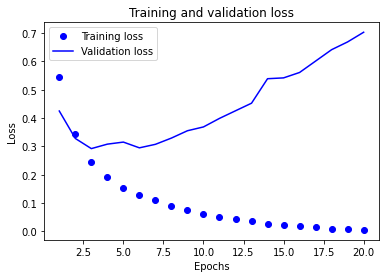

In [ ]:
history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']
acc = history_dict['acc']
val_acc = history_dict['val_acc']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


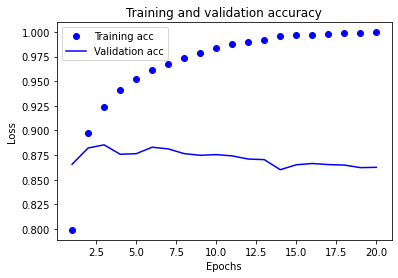

In [ ]:
plt.clf()
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.RMSprop(),
    metrics=['acc']
) 

In [ ]:
history=model.fit(X_train, y_train, epochs=3, validation_data=(X_val, y_val), batch_size=512)

Epoch 1/3
30/30 [==============================] - 1s 42ms/step - loss: 0.5238 - acc: 0.7851 - val_loss: 0.3875 - val_acc: 0.8713
Epoch 2/3
30/30 [==============================] - 1s 38ms/step - loss: 0.3076 - acc: 0.8980 - val_loss: 0.3082 - val_acc: 0.8868
Epoch 3/3
30/30 [==============================] - 1s 38ms/step - loss: 0.2174 - acc: 0.9319 - val_loss: 0.2941 - val_acc: 0.8799


In [ ]:
model.predict(X_test)

array([[0.20623076],
       [0.99869424],
       [0.4791778 ],
       ...,
       [0.11216959],
       [0.09861359],
       [0.49268317]], dtype=float32)

Изменим некоторые из параметров

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(
    loss='mse',
    optimizer=tf.keras.optimizers.RMSprop(),
    metrics=['acc']
) 

history=model.fit(X_train, y_train, epochs=8, validation_data=(X_val, y_val), batch_size=512)

Epoch 1/8
30/30 [==============================] - 1s 43ms/step - loss: 0.1612 - acc: 0.7823 - val_loss: 0.1256 - val_acc: 0.8336
Epoch 2/8
30/30 [==============================] - 1s 41ms/step - loss: 0.0828 - acc: 0.9059 - val_loss: 0.0929 - val_acc: 0.8814
Epoch 3/8
30/30 [==============================] - 1s 41ms/step - loss: 0.0563 - acc: 0.9367 - val_loss: 0.0841 - val_acc: 0.8876
Epoch 4/8
30/30 [==============================] - 1s 40ms/step - loss: 0.0452 - acc: 0.9489 - val_loss: 0.0854 - val_acc: 0.8845
Epoch 5/8
30/30 [==============================] - 1s 41ms/step - loss: 0.0338 - acc: 0.9638 - val_loss: 0.0883 - val_acc: 0.8781
Epoch 6/8
30/30 [==============================] - 1s 46ms/step - loss: 0.0266 - acc: 0.9720 - val_loss: 0.0882 - val_acc: 0.8803
Epoch 7/8
30/30 [==============================] - 1s 44ms/step - loss: 0.0211 - acc: 0.9784 - val_loss: 0.0914 - val_acc: 0.8780
Epoch 8/8
30/30 [==============================] - 1s 41ms/step - loss: 0.0171 - acc: 0.98